## Contact Details

**Dr. Mahmud Muhammad**  
(PhD, MSc, and BSc in Geology)  
Email: [mahmud.geology@hotmail.com](mailto:mahmud.geology@hotmail.com)  
Website: [mahmudm.com](http://mahmudm.com)

## Objective
The goal of this project is to develop a suite of probability density functions (PDFs) that describe Eruption Source Parameter (ESP) inputs required by the NAME model. These estimations are crucial for accurate volcanic ash dispersion modeling.

---

### Key Tasks:

1. **Automated Retrieval and Parsing of Volcanic Advisory Reports (VAA):**
   - Implement a system to automatically retrieve and parse real-time Volcanic Advisory Reports (VAA) from the Tokyo Volcanic Ash Advisory Center (TVAAC).

2. **Annual VEI Probability Parsing:**
   - Utilize the methodology outlined in Whelley et al. (2015) to extract annual Volcanic Explosivity Index (VEI) probabilities for the volcano of concern using data from VAA reports.

3. **Bayesian Sampling for Total Eruption Mass (TEM):**
   - Estimate the range of Total Eruption Mass (TEM) for a known VEI level using Bayesian probability sampling. This estimation will account for a range of tephra particl densities.

4. **Mass Eruption Rate (MER) Estimation:**
   - Calculate the Mass Eruption Rate (MER) based on the derived Total Eruption Mass (TEM).

5. **Eruption Duration Calculation:**
   - Derive the eruption duration by integrating the MER and TEM values.

6. **Plume Height Estimation from MER:**
   - Estimate the volcanic plume height using the Mass Eruption Rate (MER).

7. **MER Estimation from Plume Height:**
   - Estimate the MER  using observed Plume Height.

8. **Estimation of Mass fraction of ash particle size below 63 microns:**
   - Estimate the  Mass fraction of ash particle size below 63 microns  using the Mass Eruption Rate (MER).




---
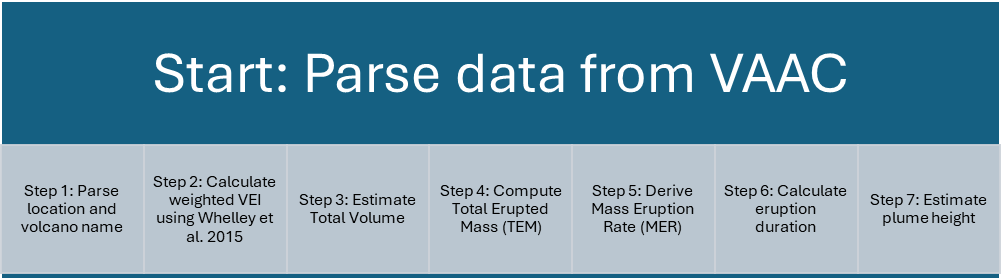

# ***Parsing of Volcanic Advisory Reports (VAA)***

In [40]:

# Using Whelley et al., 2015  paper that calculated VEI Level eruption for 750 volcanoes in southeast Asia we start estimating Eruption source paramerters from VEI and probablistic volume estimates. 

# first we load Whelley 2015 Volcano Database later will be use to filter Volcanish Ash Advisory reports from Tokyo Volcanic Ash Advisory Center in realtime (computer need internet connection to parse VAA reports)

import vei 

data_loader=vei.LOADDATA()


whelley_data=data_loader.whelley_2015(as_geodataframe=True)



In [41]:
# import Libraries and classes required to parse VAA reports and filter dataset for later use.

import vep_vaa_text
from vep_vaa_text import VEP_TVAAC_VAAText
scraper = VEP_TVAAC_VAAText()
scraper.fetch_webpage()
tables = scraper.extract_all_tables()
tables
# Perform a search Note: for realtime operation set all parameters to None to retrive the latest report VAA report
search_results = scraper.search(query='SINABUNG', date_time=None, advisory_number='2020')  # Replace with your query string, set all parameters to None to retrive latest report dates: Note takes longer processing time
downloaded_VAA_report, latest_VAA_report , latest_date_data=scraper.download_vaa_text(output_dir="./vaa_texts_2", filtered_results=search_results, csv=True, gdf=whelley_data)

downloaded_VAA_report.head(2)

,DTG,VAAC,VOLCANO,VOLCANO CODE,PSN,AREA,SUMMIT ELEV,ADVISORY NR,INFO SOURCE,AVIATION COLOUR CODE,...,FCST VA CLD +6 HR,FCST VA CLD +12 HR,FCST VA CLD +18 HR,RMK,NXT ADVISORY,Latitude,Longitude,ADVISORY_YEAR,REPORT_NUMBER,DTG_DATETIME
0,20200810/1635Z,DARWIN,SINABUNG,261080,N0310 E09824,INDONESIA,2460M,2020/12,"HIMAWARI-8, CVGHM, PIREP, WEBCAM",RED,...,10/2235Z NO VA EXP,11/0435Z NO VA EXP,11/1035Z NO VA EXP,VA TO FL320 LAST PARTIALLY OBS ON SAT IMAGERY ...,NO LATER THAN 20200810/2235Z=,3.166667,98.4,2020,12,2020-08-10 16:35:00
1,20200810/1030Z,DARWIN,SINABUNG,261080,N0310 E09824,INDONESIA,2460M,2020/10,"HIMAWARI-8, CVGHM, PIREP, WEBCAM",RED,...,10/1630Z SFC/FL140 N0303 E09852 - N0337,10/2230Z SFC/FL140 N0253 E10049 - N0348,11/0430Z NO VA EXP,ERUPTION HAS CEASED. VA TO FL320 LAST PARTIALL...,NO LATER THAN 20200810/1630Z=,3.166667,98.4,2020,10,2020-08-10 10:30:00


In [42]:
latest_date_data

,DTG,VAAC,VOLCANO,VOLCANO CODE,PSN,AREA,SUMMIT ELEV,ADVISORY NR,INFO SOURCE,AVIATION COLOUR CODE,...,FCST VA CLD +12 HR,FCST VA CLD +18 HR,RMK,NXT ADVISORY,Latitude,Longitude,ADVISORY_YEAR,REPORT_NUMBER,DTG_DATETIME,Altitude_Meters
0,20200810/1635Z,DARWIN,SINABUNG,261080,N0310 E09824,INDONESIA,2460M,2020/12,"HIMAWARI-8, CVGHM, PIREP, WEBCAM",RED,...,11/0435Z NO VA EXP,11/1035Z NO VA EXP,VA TO FL320 LAST PARTIALLY OBS ON SAT IMAGERY ...,NO LATER THAN 20200810/2235Z=,3.09,9.92,2020,12,2020-08-10 16:35:00,4267.2


In [43]:


# Retrive data from the latest report date
from rich.console import Console
from rich.table import Table

# Initialize the console
console = Console()

# Create a table for a professional and structured output
table = Table(title="Volcanic Activity Observations", show_lines=True, title_style="bold blue")

# Define table columns
table.add_column("Parameter", style="dim", width=25)
table.add_column("Value", style="bold white", justify="center")

# Populate the table with data, if available
if 'VOLCANO' in latest_date_data.columns:
    volcano_name = latest_date_data['VOLCANO'].to_list()[0]
    table.add_row("Site of Volcanic Activity", volcano_name)

if 'Altitude_Meters' in latest_date_data.columns:
    observed_ash_altitude_meter = latest_date_data['Altitude_Meters'].to_list()[0]
    table.add_row("Observed Ash Altitude (m ASL)", str(observed_ash_altitude_meter))

if 'Latitude' in latest_date_data.columns:
    latitude = latest_date_data['Latitude'].to_list()[0]
    table.add_row("Latitude", str(latitude))

if 'Longitude' in latest_date_data.columns:
    longitude = latest_date_data['Longitude'].to_list()[0]
    table.add_row("Longitude", str(longitude))



# Call the search_whelley_2015 method on the instance
search_results, vei_range = data_loader.search_whelley_2015(Volcano=volcano_name, max_vei_returns=2)

# View the search results
#print(f"Potential VEI Levels for  Volcano site {volcano_name} is based on Whelley et al. 2015 paper   {vei_range}")
#print(search_results)

table.add_row(f"Potential VEI Levels for  Volcano  {volcano_name}  based on Whelley et al. 2015 paper", str(vei_range))

# Render the table
console.print(table)



     Volcanic Activity Observations     
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Parameter                 ┃  Value   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Site of Volcanic Activity │ SINABUNG │
├───────────────────────────┼──────────┤
│ Observed Ash Altitude (m  │  4267.2  │
│ ASL)                      │          │
├───────────────────────────┼──────────┤
│ Latitude                  │   3.09   │
├───────────────────────────┼──────────┤
│ Longitude                 │   9.92   │
├───────────────────────────┼──────────┤
│ Potential VEI Levels for  │  [2, 3]  │
│ Volcano  SINABUNG  based  │          │
│ on Whelley et al. 2015    │          │
│ paper                     │          │
└───────────────────────────┴──────────┘

# Step 1: Define Total Eruption Mass (TEM) from VEI
This cell initializes the `VEI_BulkVolume_Mass` class to perform probabilistic calculations of total eruption mass based on known VEI values.

## Key Parameters:
- `use_default_densities=True`: Applies default density values for tephra deposits.
- `density_min=800` and `density_max=1700` (kg/m³): Define the density range for volcanic materials.
- `num_samples=1000`: Specifies the number of Monte Carlo samples for probabilistic calculations.

## Outcome:
The `vei_toMass` object enables generating probabilistic TEM values for subsequent calculations.


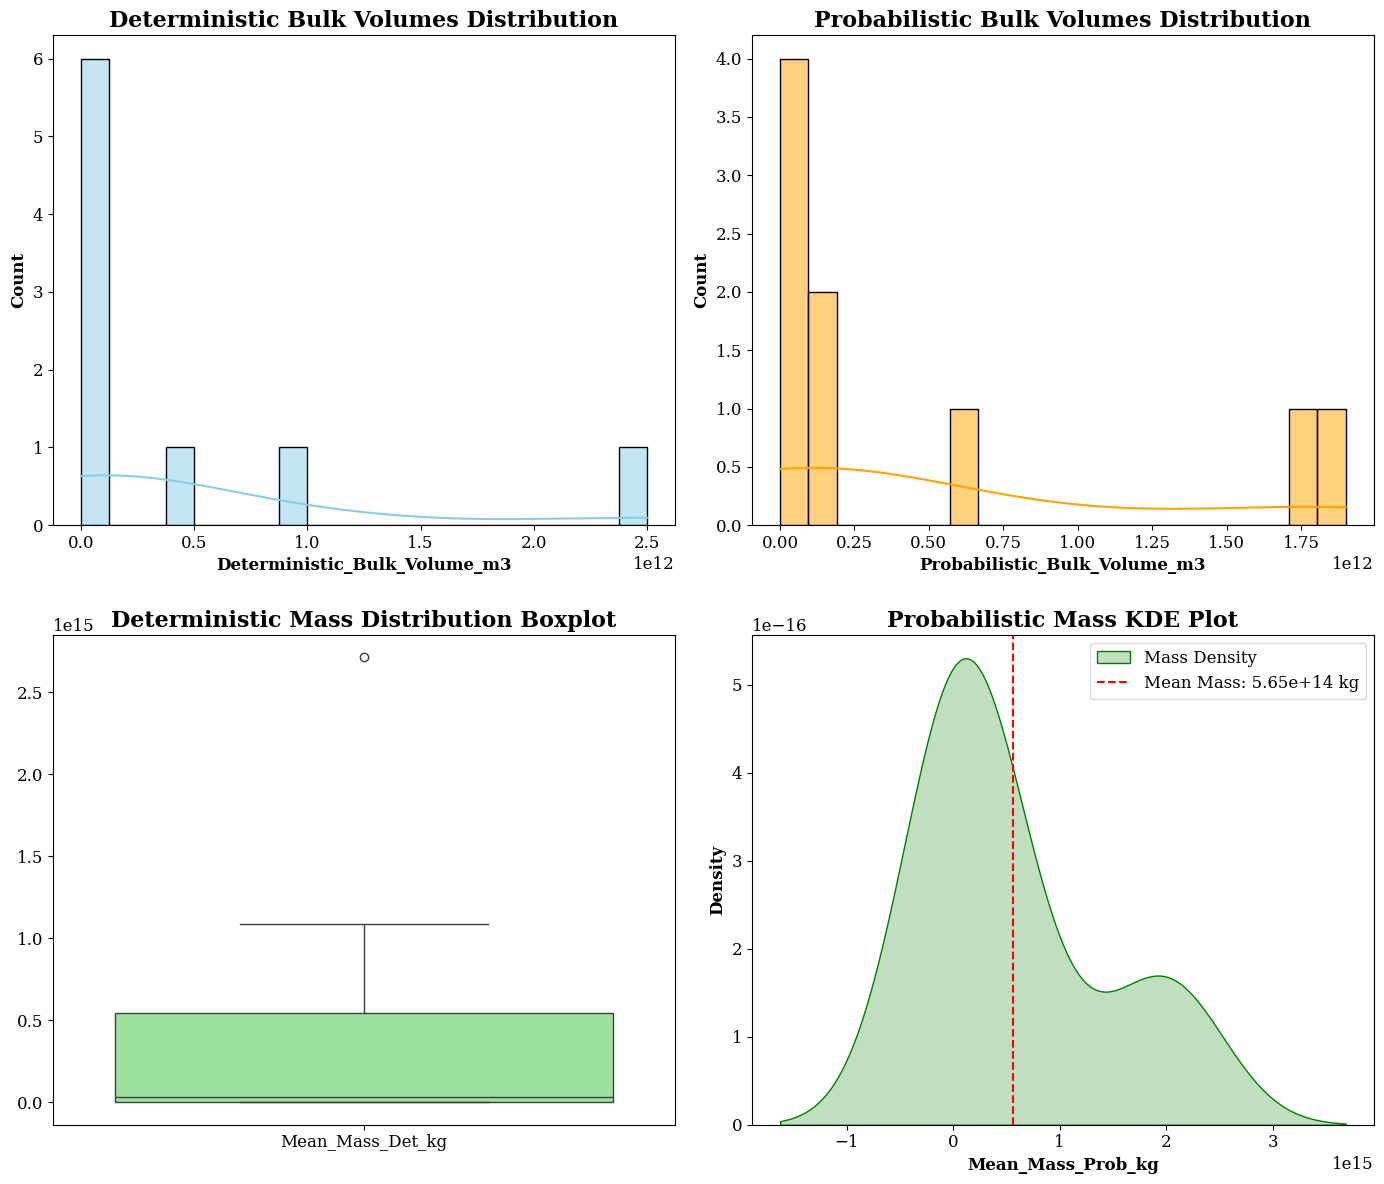

c:\Users\mahmud\OneDrive\Singapore_project\data\Modules\phase_1\vei.py:778: UserWarning: Mismatched number of handles and labels: len(handles) = 0 len(labels) = 4
  interpretation_legend = plt.legend(handles=[], labels=interpretation_text,


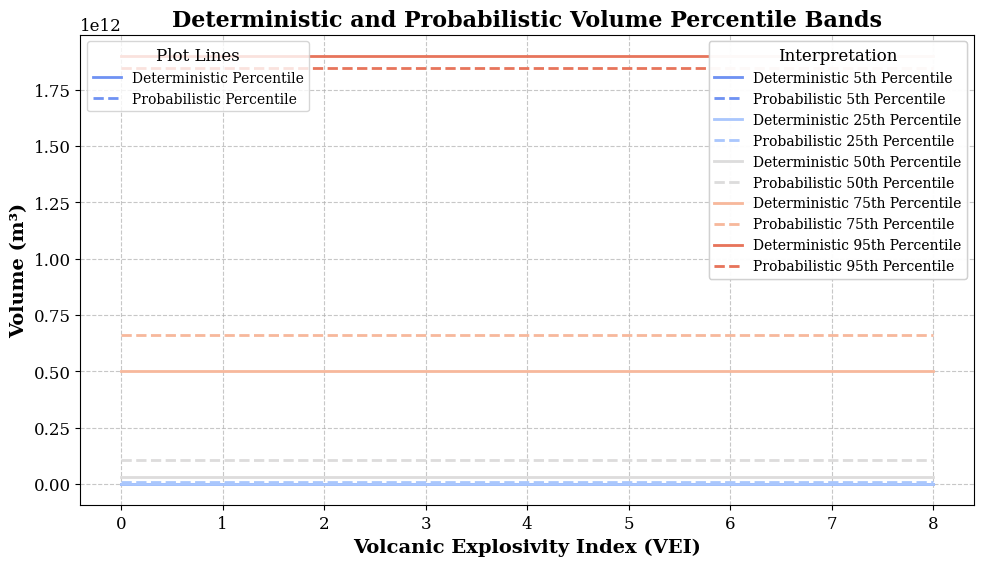

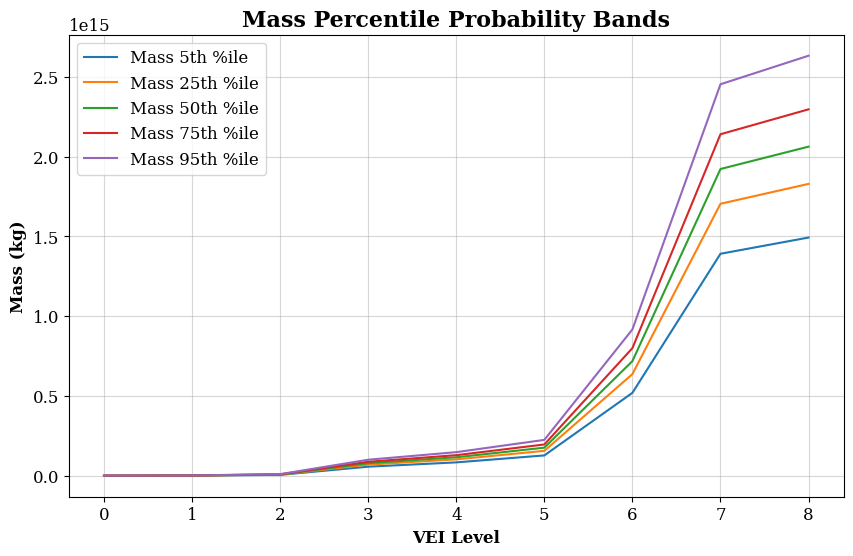

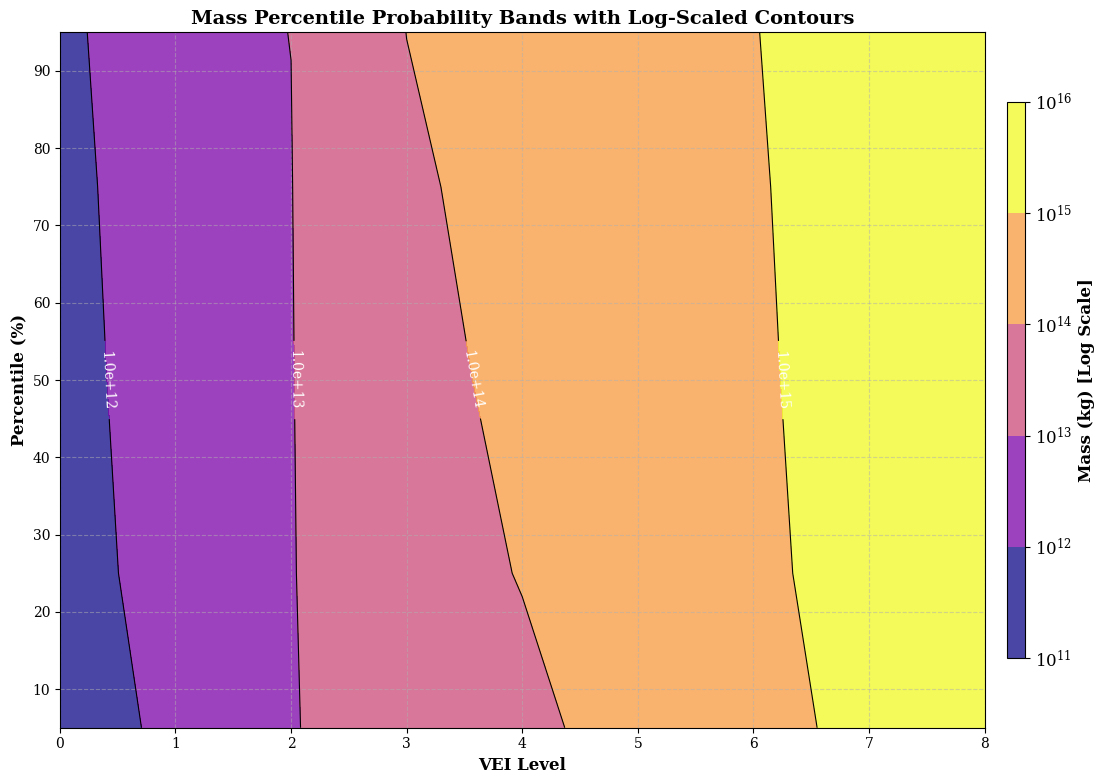

c:\Users\mahmud\OneDrive\Singapore_project\data\Modules\phase_1\vei.py:778: UserWarning: Mismatched number of handles and labels: len(handles) = 0 len(labels) = 4
  interpretation_legend = plt.legend(handles=[], labels=interpretation_text,


In [44]:
from vei import VEI_BulkVolume_Mass

# Initialize the class
vei_toMass = VEI_BulkVolume_Mass(use_default_densities=True, density_min=800, density_max=1200, num_samples=10000000)


# Generate probabilistic volumes
vei_toMass.generate_probabilistic_volumes()

# Calculate masses using probabilistic volumes
vei_toMass.calculate_mass(calculate_deterministic=True, calculate_probabilistic=True)

vei_toMass.calculate_percentile_bands()



# # Generate summary statistics
vei_toMass.generate_summary_statistics()

# # Visualize the results
vei_toMass.visualize_statistics()

# # Calculate and plot percentile bands

vei_toMass.plot_percentile_bands()

# # Export results
vei_toMass.export_statistics(filename="summary_statistics.csv")
vei_toMass.export_volumes_and_masses()

vei_toMass.export_data()

vei_toMass.save_outputs_to_pdf()


# Step 2: Load Volcanic Data for Model Inputs and Validation
This cell loads datasets containing eruption source parameters and metadata.

## Data Sources:
1. `Mastin`: Dataset of VEI-related eruption parameters.
2. `Aubrey`: Dataset with parameters for eruption dynamics.
3. `IVESPA`: Integrated Volcanic Eruption Source Parameters Archive for further modeling.

## Purpose:
- These datasets provide observational constraints and inputs for modeling eruption parameters.
- Support statistical analysis and correlation studies to validate models.



In [45]:
import vei
from vei import  analyze_correlations 

data_loader=vei.LOADDATA()


Mastin = data_loader.load_Mastin(as_geodataframe=False)
Aubrey=data_loader.load_Aubry(as_geodataframe=False)
IVESPA=data_loader.load_IVESPA(as_geodataframe=False)
Sparks=data_loader.load_Sparks(as_geodataframe=False)
mastin_a=data_loader.load_Mastin_a(as_geodataframe=True)

# analyze_correlations(Mastin, 'Mastin', threshold=0.7)

# analyze_correlations(Aubrey, 'Aubrey', threshold=0.7)

# analyze_correlations(Sparks, 'Sparks', threshold=0.7)

# analyze_correlations(IVESPA, 'IVESPA', threshold=0.7)

#analyze_correlations(mastin_a, 'IVESPA', threshold=0.9)

import pandas as pd 

df= pd.concat([ Aubrey, IVESPA], axis=0, join='inner')



# Step 3: Estimate Mass Eruption Rate (MER)
This cell prepares TEM data for use with the `MERPredictor` class.

## Inputs:
- `tem_values`: Extracted mean probabilistic TEM values (`Mean_Mass_Prob_kg`) generated by the VEI model.

## Purpose:
- `tem_values` serve as input to estimate MER, an essential eruption source parameter.
- MER will be used in subsequent steps to calculate eruption duration and plume rise.


In [46]:
from mer_predict import MERPredictor
import pandas as pd 

data=vei_toMass.data

# Drop first row (VEI zero) because VEI zero is None Explosive

#data = data.drop(index=data.index[0]).reset_index(drop=True)


# Ensuring the VEI column is numeric
data['VEI'] = pd.to_numeric(data['VEI'], errors='coerce')

# Filtering the dataframe based on VEI column and list
data = data[data['VEI'].isin(vei_range)].reset_index(drop=True)

data

,VEI,Bulk_Volume_km3,Deterministic_Bulk_Volume_m3,Probabilistic_Bulk_Volume_m3,Mean_Mass_Det_kg,Std_Mass_Det_kg,Mean_Mass_Prob_kg,Std_Mass_Prob_kg,Det_Volume_5th,Uncertainty_Det_Volume_5th,...,Mass_50th,Mass_75th,Mass_95th,Uncertainty_Mass_5th,Uncertainty_Mass_25th,Uncertainty_Mass_50th,Uncertainty_Mass_75th,Uncertainty_Mass_95th,Best_Mass_Estimate,Best_Mass_Estimate_Uncertainty
0,2,0.1,1.000000e+08,7.388868e+09,1.084903e+11,3.027580e+09,8.021236e+12,1.347096e+12,2300000.0,230000.0,...,8.021535e+12,8.929664e+12,1.023625e+13,5.804319e+11,7.112171e+11,8.021535e+11,8.929664e+11,1.023625e+12,4.431932e+12,1.176737e+12
1,3,3.0,3.000000e+09,7.258250e+10,3.254692e+12,9.081072e+10,7.879944e+13,1.324054e+13,2300000.0,230000.0,...,7.880253e+13,8.773142e+13,1.005779e+14,5.701678e+12,6.987197e+12,7.880253e+12,8.773142e+12,1.005779e+13,4.356114e+13,1.156150e+13


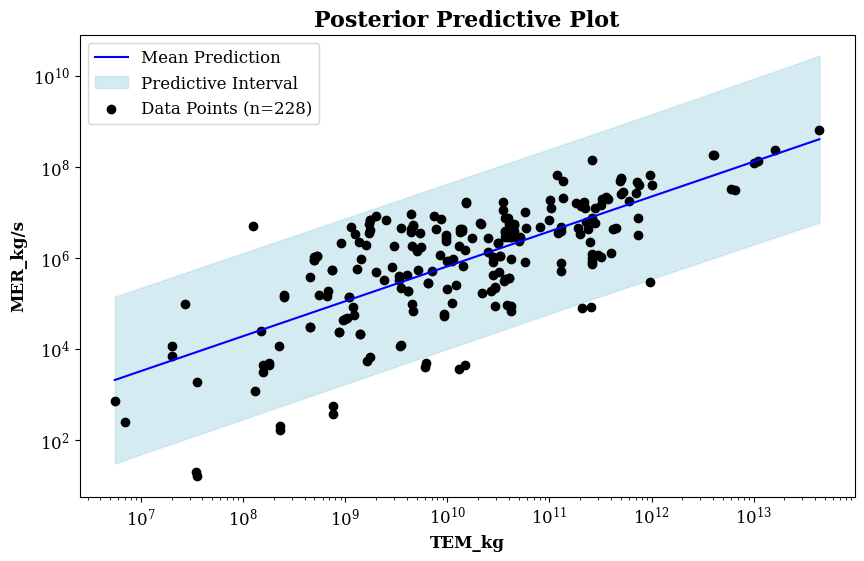

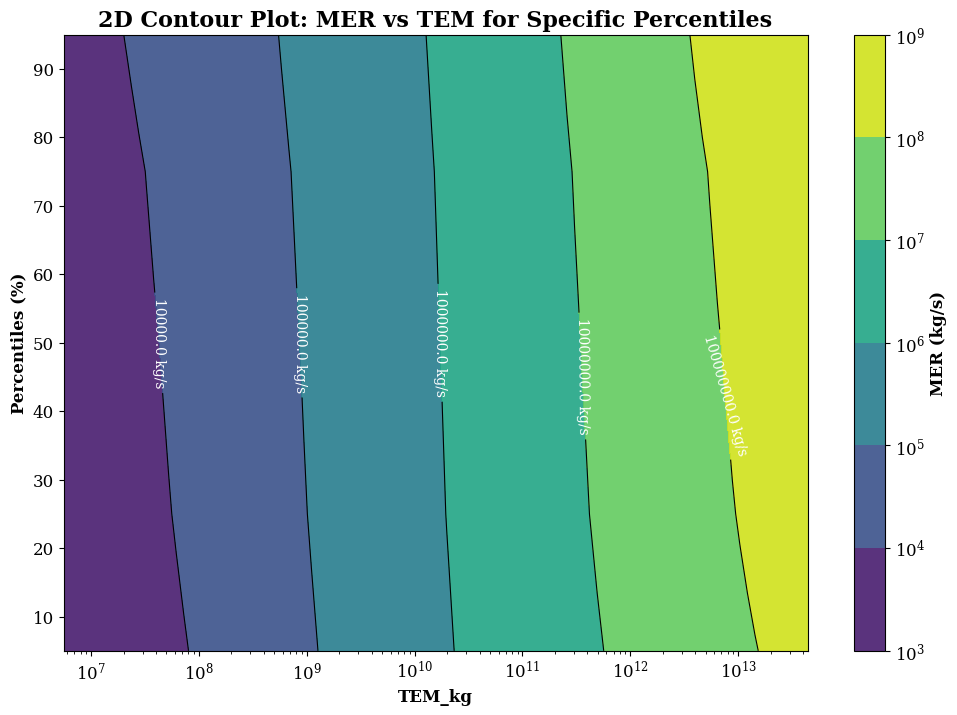

In [47]:


#tem_values=data.Mean_Mass_Prob_kg.to_list()
tem_values=data.Mean_Mass_Det_kg.to_list()




#tem_values=[1.998468e+11 , 3.585472e+14 ]


model = MERPredictor(df)
model.plot_posterior_predictive()
mer_results=model.predict_mer(tem_values)
model.plot_percentiles_vs_tem()
durations = model.convert_percentiles_to_duration(tem_values)
print(durations)


# Step 4: Correlate VEI with MER Results
This cell adds the VEI values from the processed data into the `mer_results` DataFrame.

## Purpose:
- Ensures that MER results are directly associated with their corresponding VEI values.
- Facilitates traceability and cross-comparison during analysis.



In [48]:
mer_results["VEI"]=data['VEI']

# Step 5: Review Mass Eruption Rate (MER) Results
This cell displays the `mer_results` DataFrame, which includes the calculated MER values and associated VEI data.

## Purpose:
- Provides an overview of the MER estimates to verify accuracy and consistency.



In [49]:
mer_results

,TEM_kg,MERPercentile_5,Uncertainty_Lower_5,Uncertainty_Upper_5,MERPercentile_25,Uncertainty_Lower_25,Uncertainty_Upper_25,MERPercentile_50,Uncertainty_Lower_50,Uncertainty_Upper_50,...,Best_MER_Estimate_kg/s,Best_MER_Estimate_kg/s_Uncertainty,Duration_hr_P5,Duration_hr_P25,Duration_hr_P50,Duration_hr_P75,Duration_hr_P95,Duration_hr_best_estimate,Duration_hr_best_estimate_Uncertainty,VEI
0,1.084903e+11,3.096971e+06,2.118679e+06,3.302910e+06,3.648775e+06,3.545267e+06,3.744617e+06,4.102960e+06,4.010537e+06,4.187653e+06,...,2.356004e+06,4.458743e+06,9.697414,8.238386,7.338108,6.548809,5.527220,12.853059,6.596794,2
1,3.254692e+12,3.395452e+07,1.838617e+07,3.760288e+07,4.547414e+07,4.310616e+07,4.774144e+07,5.589548e+07,5.373653e+07,5.795761e+07,...,5.856907e+07,1.347509e+08,26.406888,19.794934,16.192163,13.222836,9.822467,15.640027,5.875602,3


# Step 6: Select Central MER Values for Plume Height Prediction
This cell extracts the 50th percentile (median) MER values from the `mer_results` DataFrame.

## Purpose:
- Focuses on the central tendency of the MER distribution, minimizing the influence of outliers.
- The Best MER values (`mer_list`) are determined using the range between the (`95th and 5th percentiles`) and are used as input for plume height predictions..


In [50]:
mer_list=mer_results['Best_MER_Estimate_kg/s'].to_list()


# Step 7: Estimate Plume Rise Based on MER
This cell initializes the `PlumeHeightPredictor` class and calculates plume heights using the median MER values.

## Methodology:
- Utilizes the `IVESPA` dataset for plume height predictions with uncertainty quantification.
- Outputs plume height estimates based on the MER values (`mer_list`).

## Purpose:
- Plume rise estimation is critical for assessing the environmental and aviation impacts of volcanic eruptions.



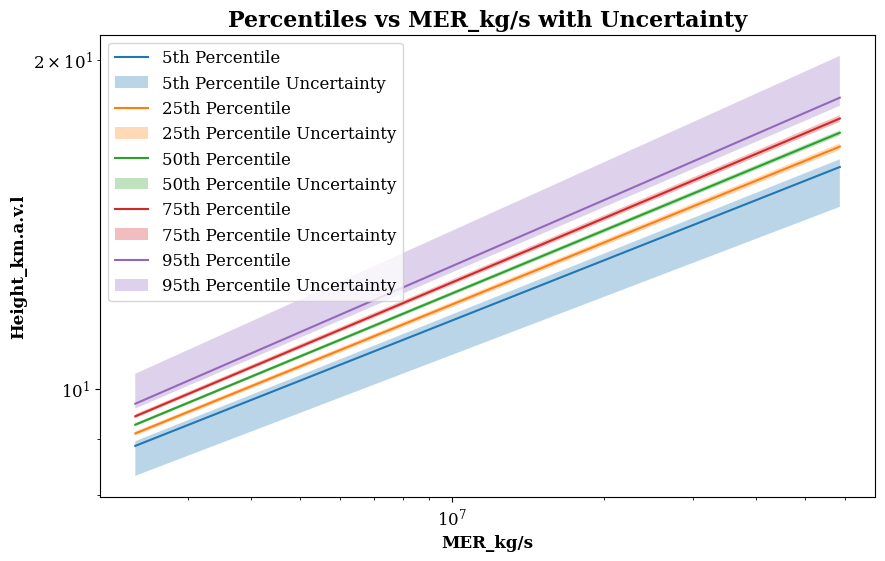

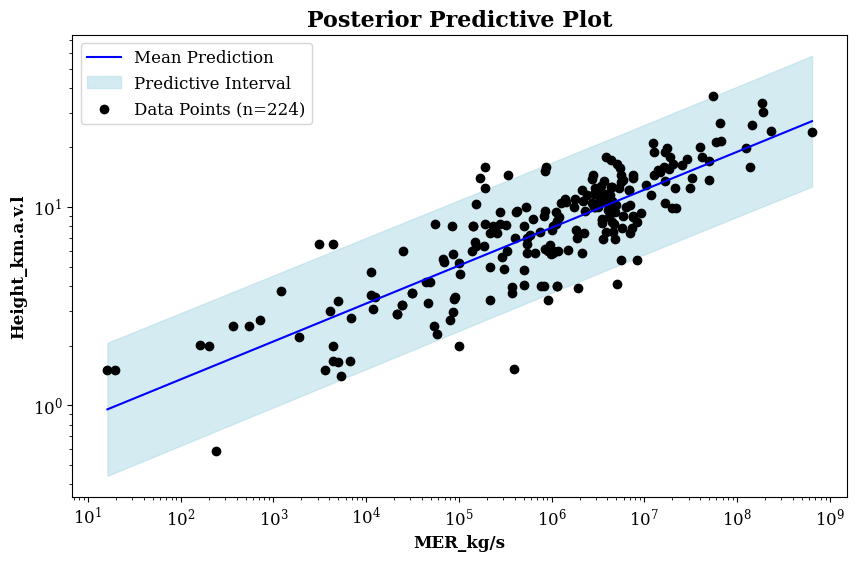

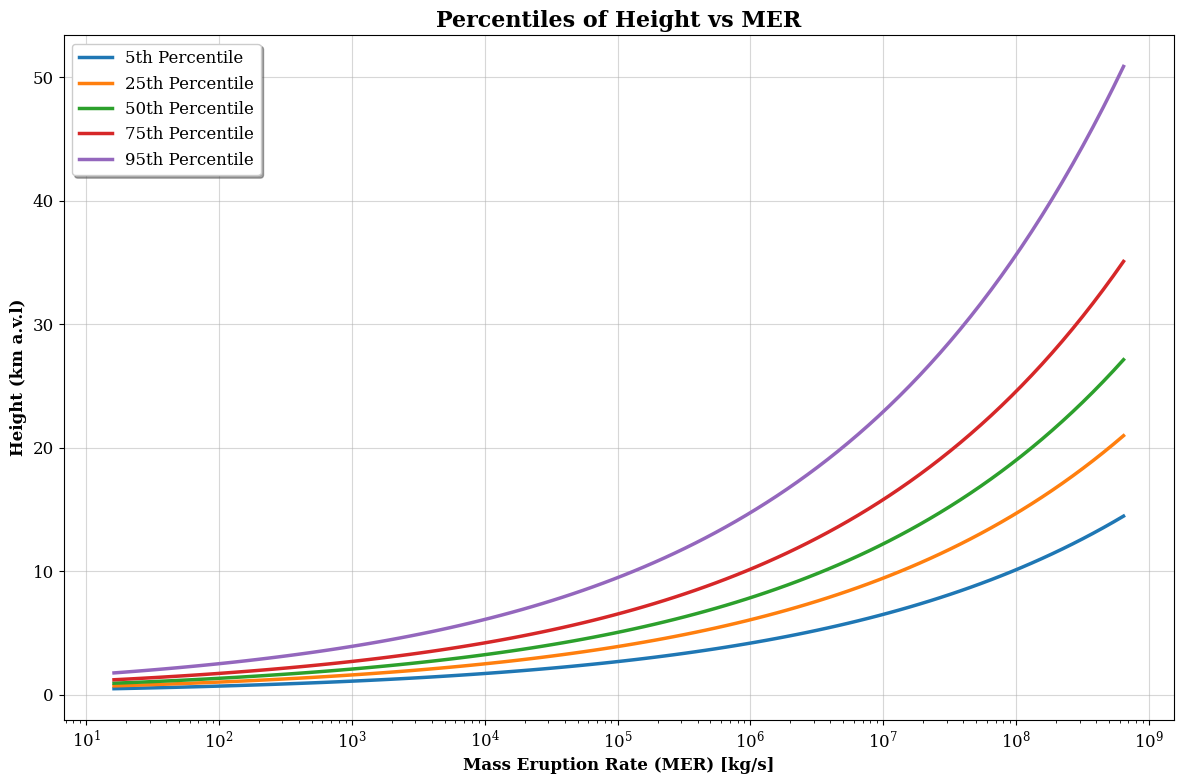

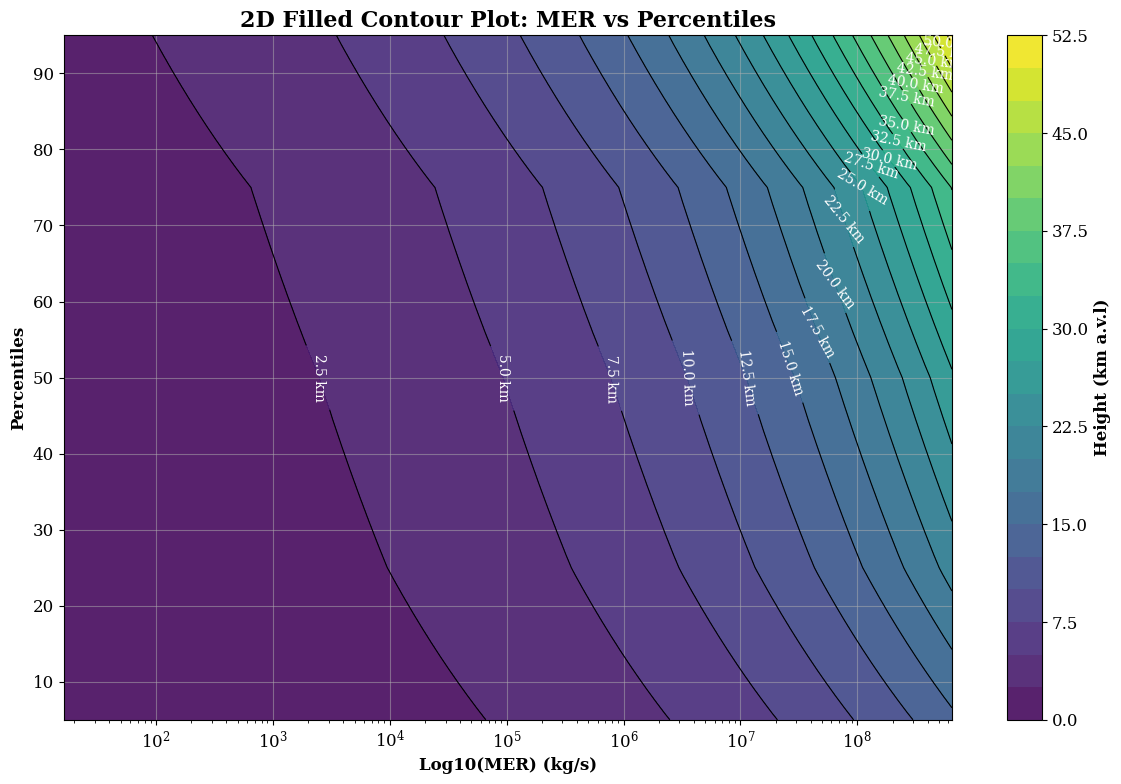

In [51]:
from plume_rise_predict import PlumeHeightPredictor

# Initialize the PlumeHeightPredictor
predictor = PlumeHeightPredictor(df)

heights=predictor.predict_height_with_uncertainty(mer_list, output_file='predicted_height_with_uncertainty.csv')

# Calculate Percentiles with Uncertainty

percentiles_results = predictor.calculate_percentiles_with_uncertainty(mer_list)
print(percentiles_results)

# Plot Percentiles with Uncertainty
predictor.plot_percentiles_with_uncertainty(mer_list)

# Plot Posterior Predictive Distribution
predictor.plot_posterior_predictive()

# Plot Percentiles Without Uncertainty
predictor.plot_percentiles_vs_mer()


# Step 8: Review Plume Height Estimates
This cell displays the predicted plume heights.

## Purpose:
- Offers an immediate review of the plume height results for quality control and interpretation.



In [52]:
heights['VEI']=mer_results['VEI']
# List of columns to be assigned
columns_to_assign = ['Duration_hr_P5', 'Duration_hr_P25', 'Duration_hr_P50', 'Duration_hr_P75', 'Duration_hr_P95', 'Duration_hr_best_estimate', 'Duration_hr_best_estimate_Uncertainty']

# Assign values from mer_results to heights for these columns
heights[columns_to_assign] = mer_results[columns_to_assign]



heights.to_csv('Final_prediction_results.csv')



#heights.head(10)
heights

,MER_kg/s,HeightPercentile_5,Uncertainty_Lower_5,Uncertainty_Upper_5,HeightPercentile_25,Uncertainty_Lower_25,Uncertainty_Upper_25,HeightPercentile_50,Uncertainty_Lower_50,Uncertainty_Upper_50,...,Best_Height_Estimate_km,Best_Height_Estimate_km_Uncertainty,VEI,Duration_hr_P5,Duration_hr_P25,Duration_hr_P50,Duration_hr_P75,Duration_hr_P95,Duration_hr_best_estimate,Duration_hr_best_estimate_Uncertainty
0,2.356004e+06,8.879990,8.329733,8.962584,9.111412,9.069960,9.147674,9.281695,9.249513,9.316692,...,0.821682,1.391621,2,9.697414,8.238386,7.338108,6.548809,5.527220,12.853059,6.596794
1,5.856907e+07,15.946091,14.410793,16.217911,16.660109,16.533267,16.775158,17.161960,17.069273,17.258340,...,2.516836,3.928226,3,26.406888,19.794934,16.192163,13.222836,9.822467,15.640027,5.875602


In [53]:
from rich.console import Console
from rich.table import Table

# Ensure VEI is first
if "VEI" not in heights.columns:
    raise KeyError("The 'VEI' column is missing from the DataFrame.")

cols = ["VEI"] + [col for col in heights.columns if col != "VEI"]
heights = heights[cols]

# Rich Console for better formatting
console = Console()

# Function to print DataFrame in chunks of six columns, keeping VEI first
def print_six_columns_with_vei_first(df):
    num_cols = len(df.columns)
    for i in range(1, num_cols, 3):  # 5 because VEI is fixed
        # Slice five columns at a time, after the first column
        cols = ["VEI"] + list(df.columns[i:i+3])
        
        # Create a table for this chunk
        table = Table(title="VEI and Related Data")
        for col in cols:
            table.add_column(col, justify="center")
        
        # Add rows to the table
        for _, row in df[cols].iterrows():
            table.add_row(*[str(cell) for cell in row])
        
        # Print the table
        console.print(table)

# Display the DataFrame
print_six_columns_with_vei_first(heights)


                         VEI and Related Data                         
┏━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ VEI ┃     MER_kg/s      ┃ HeightPercentile_5 ┃ Uncertainty_Lower_5 ┃
┡━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ 2.0 │ 2356004.493507403 │ 8.879989575805126  │  8.329732619298941  │
│ 3.0 │ 58569065.61349128 │ 15.946091231530955 │  14.41079254583193  │
└─────┴───────────────────┴────────────────────┴─────────────────────┘

                           VEI and Related Data                           
┏━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ VEI ┃ Uncertainty_Upper_5 ┃ HeightPercentile_25 ┃ Uncertainty_Lower_25 ┃
┡━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ 2.0 │  8.962584275883845  │  9.111411665138741  │  9.069959841114452   │
│ 3.0 │ 16.217910902984674  │ 16.660108929660076  │  16.533266897867836  │
└─────┴─────────────────────┴─────────────────────┴──────────────────────┘

                           VEI and Related Data                            
┏━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ VEI ┃ Uncertainty_Upper_25 ┃ HeightPercentile_50 ┃ Uncertainty_Lower_50 ┃
┡━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ 2.0 │  9.147674297363453   │  9.281694861835053  │  9.249512566088953   │
│ 3.0 │  16.775158190485048  │ 17.161960406554524  │  17.069272864228402  │
└─────┴──────────────────────┴─────────────────────┴──────────────────────┘

                           VEI and Related Data                            
┏━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ VEI ┃ Uncertainty_Upper_50 ┃ HeightPercentile_75 ┃ Uncertainty_Lower_75 ┃
┡━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ 2.0 │  9.316691619223205   │   9.4565608466045   │  9.417700109343388   │
│ 3.0 │  17.258340386815195  │ 17.683022340489803  │  17.563276298188235  │
└─────┴──────────────────────┴─────────────────────┴──────────────────────┘

                           VEI and Related Data                            
┏━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ VEI ┃ Uncertainty_Upper_75 ┃ HeightPercentile_95 ┃ Uncertainty_Lower_95 ┃
┡━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ 2.0 │  9.497008495813102   │  9.701671948493086  │  9.606614281854208   │
│ 3.0 │  17.815733497350113  │  18.46292753959523  │  18.17518155950278   │
└─────┴──────────────────────┴─────────────────────┴──────────────────────┘

                                     VEI and Related Data                                     
┏━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ VEI ┃ Uncertainty_Upper_95 ┃ Best_Height_Estimate_km ┃ Best_Height_Estimate_km_Uncertainty ┃
┡━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 2.0 │  10.354204831003699  │   0.8216823726879596    │         1.3916205551198537          │
│ 3.0 │  20.146137355669925  │    2.516836308064276    │         3.9282264526852515          │
└─────┴──────────────────────┴─────────────────────────┴─────────────────────────────────────┘

                         VEI and Related Data                         
┏━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ VEI ┃   Duration_hr_P5   ┃  Duration_hr_P25   ┃  Duration_hr_P50   ┃
┡━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ 2.0 │ 9.697413664498807  │ 8.238385887066197  │ 7.3381082145273195 │
│ 3.0 │ 26.406887606263332 │ 19.794934343101506 │ 16.192162872673403 │
└─────┴────────────────────┴────────────────────┴────────────────────┘

                            VEI and Related Data                            
┏━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ VEI ┃  Duration_hr_P75   ┃  Duration_hr_P95  ┃ Duration_hr_best_estimate ┃
┡━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 2.0 │ 6.548808846345508  │ 5.527220272531921 │     12.85305892546757     │
│ 3.0 │ 13.222836376123913 │ 9.822467187015429 │    15.640027234396946     │
└─────┴────────────────────┴───────────────────┴───────────────────────────┘

             VEI and Related Data              
┏━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ VEI ┃ Duration_hr_best_estimate_Uncertainty ┃
┡━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 2.0 │           6.596794317718479           │
│ 3.0 │           5.875602313234533           │
└─────┴───────────────────────────────────────┘

# Refining Mass Eruption Rate (MER) Estimates Using Observed Plume Height

When plume height is observed through satellite imagery or infrasound data, it provides an opportunity to enhance previously predicted MER values. By leveraging this direct observation of plume height, we can derive a more accurate estimate of the MER, aligning it closely with the actual eruption dynamics.

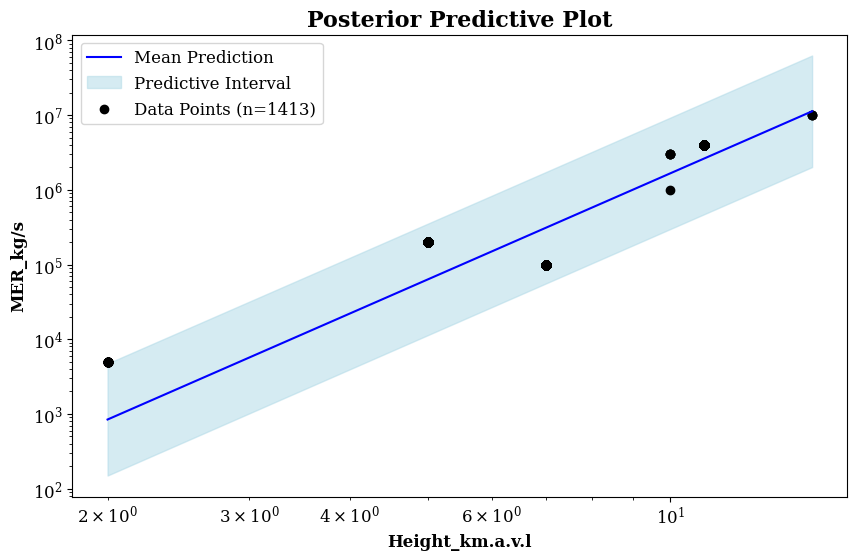

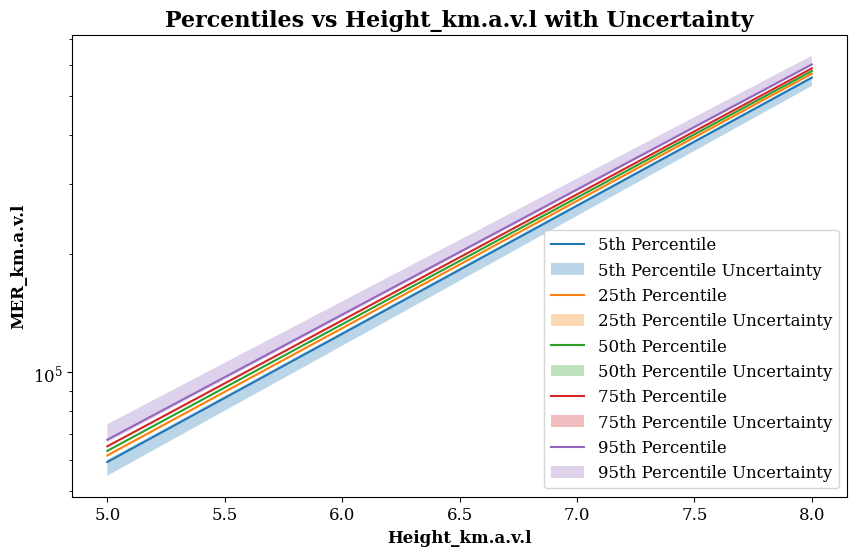

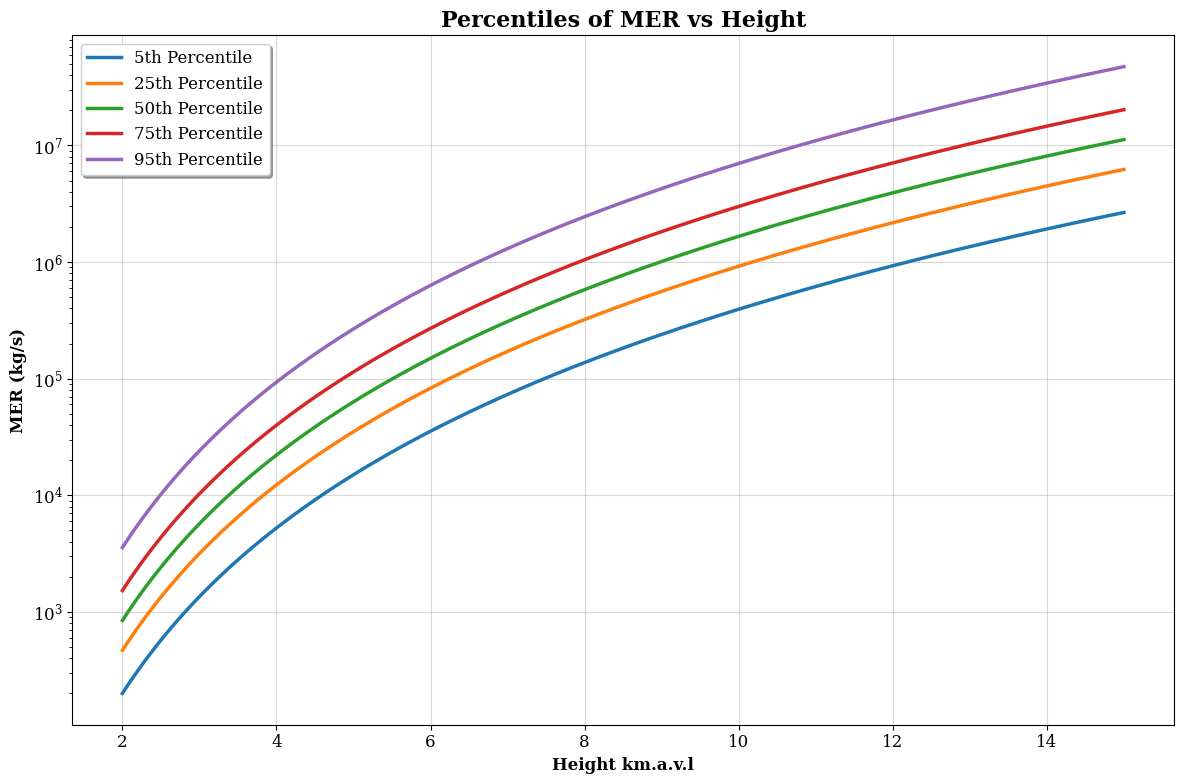

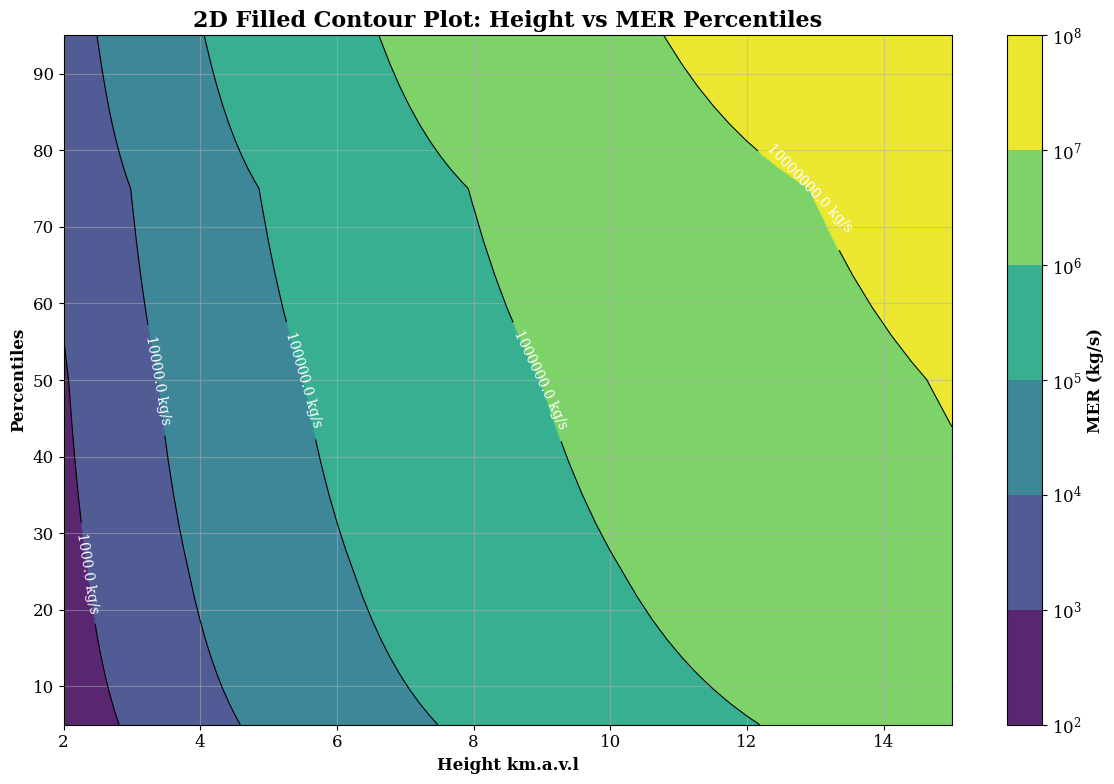

,Height_km.a.v.l,MERPercentile_5,Uncertainty_Lower_5,Uncertainty_Upper_5,MERPercentile_25,Uncertainty_Lower_25,Uncertainty_Upper_25,MERPercentile_50,Uncertainty_Lower_50,Uncertainty_Upper_50,MERPercentile_75,Uncertainty_Lower_75,Uncertainty_Upper_75,MERPercentile_95,Uncertainty_Lower_95,Uncertainty_Upper_95,Best_MER_Estimate_km,Best_MER_Estimate_km_Uncertainty
0,5,59298.970586,54834.818641,60095.380949,61591.084214,61188.465025,61971.535332,63302.925497,62968.828675,63627.974544,65011.593045,64629.165918,65434.884521,67590.186068,66607.560374,73348.920879,8291.215482,13253.539930
1,8,558116.631819,535593.067374,562847.030880,571064.654538,568801.956990,573189.576914,580181.352778,578473.506582,581808.475270,589117.142069,587039.511114,591361.094434,603169.954856,597851.887123,625230.577033,45053.323037,62383.546153


In [54]:
from mer_from_height import MERPredictorFromHeight

predictor = MERPredictorFromHeight(mastin_a)
# Predict MER for specific heights
# Save predictions to a CSV
Observed_plume_height=[5,8]
predictions=predictor.predict_MER_with_uncertainty(Observed_plume_height, output_file='predicted_mer_fromheight.csv')


# Visualize the posterior predictive distribution
predictor.plot_posterior_predictive()

# Visualize percentiles with uncertainty
predictor.plot_percentiles_with_uncertainty(Observed_plume_height)

predictor.plot_percentiles_vs_mer()

predictions


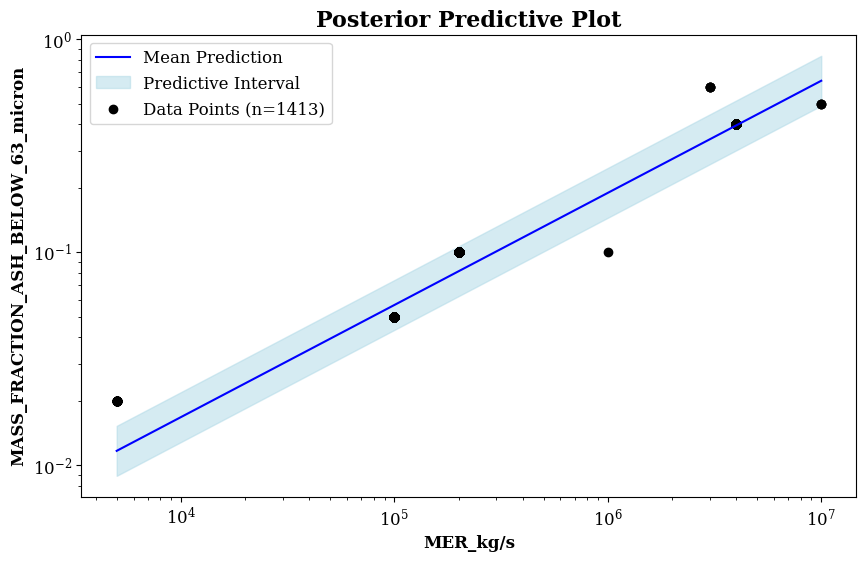

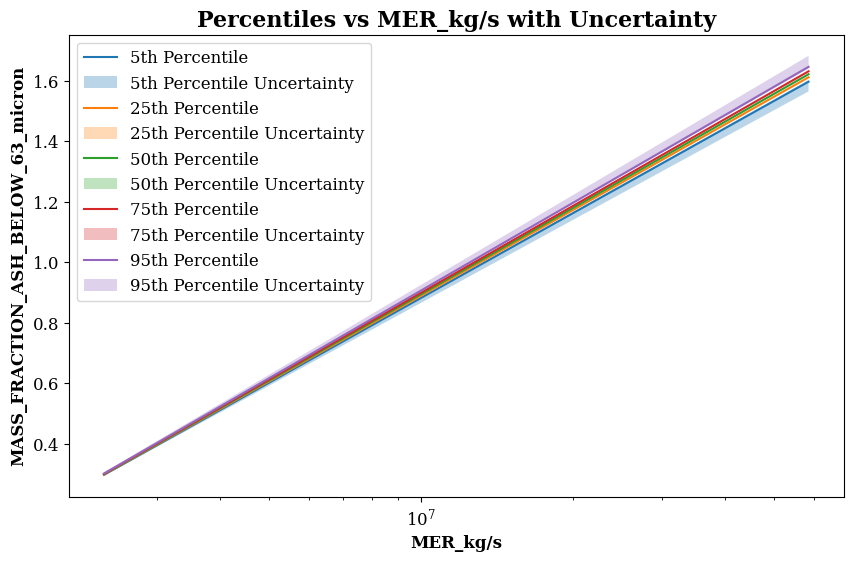

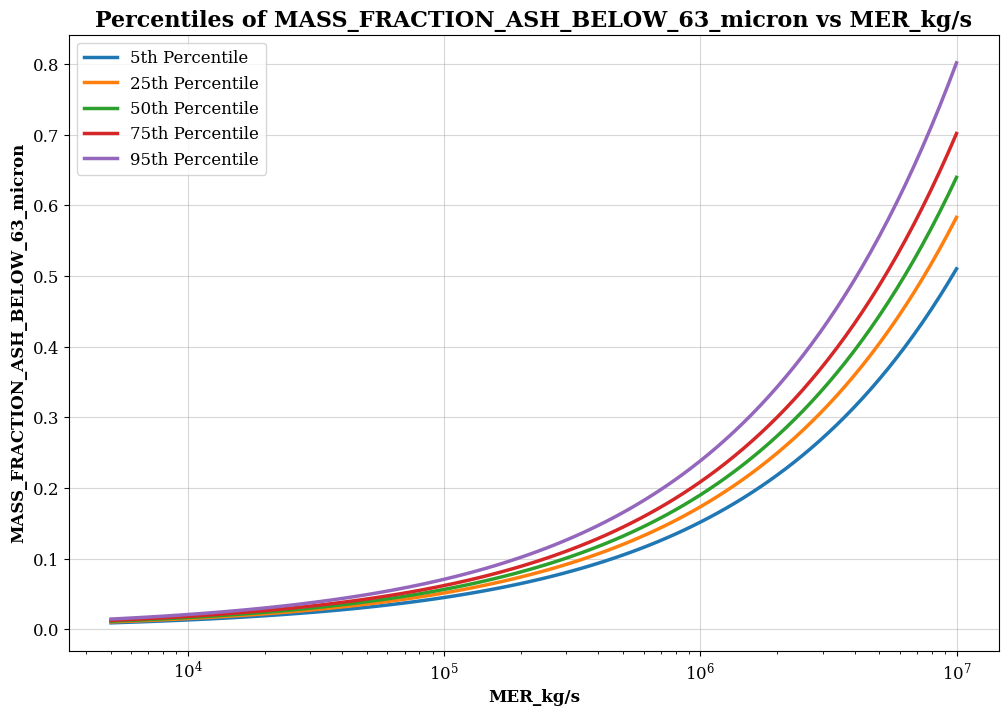

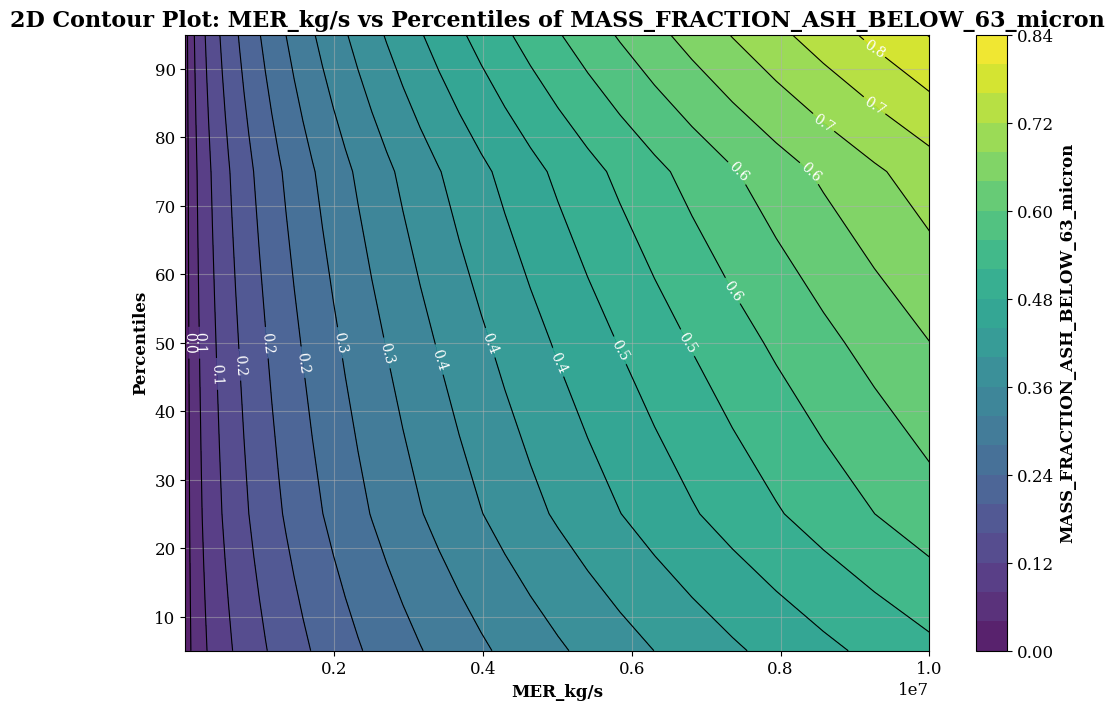

In [55]:
from ParticleSize_MER import Predict_ASH_BELOW_63_Micron

from vei import data_loader

#mastin_a=data_loader.load_Mastin_a(as_geodataframe=True)

psize_model=Predict_ASH_BELOW_63_Micron(mastin_a)

psize_model.set_xvar('MER_kg/s')
psize_model.set_yvar('MASS_FRACTION_ASH_BELOW_63_micron')


psize_model.calculate_percentiles_with_uncertainty(mer_list)
psize_model.predict_with_uncertainty(mer_list)

psize_model.plot_posterior_predictive()


# Visualize percentiles with uncertainty
psize_model.plot_percentiles_with_uncertainty(mer_list)

psize_model.plot_percentiles()

psize_predictions=psize_model.predict_with_uncertainty(mer_list)

In [56]:
psize_predictions

,MER_kg/s,MASS_FRACTION_ASH_BELOW_63_micron_Percentile_5,Uncertainty_Lower_5,Uncertainty_Upper_5,MASS_FRACTION_ASH_BELOW_63_micron_Percentile_25,Uncertainty_Lower_25,Uncertainty_Upper_25,MASS_FRACTION_ASH_BELOW_63_micron_Percentile_50,Uncertainty_Lower_50,Uncertainty_Upper_50,MASS_FRACTION_ASH_BELOW_63_micron_Percentile_75,Uncertainty_Lower_75,Uncertainty_Upper_75,MASS_FRACTION_ASH_BELOW_63_micron_Percentile_95,Uncertainty_Lower_95,Uncertainty_Upper_95
0,2.356004e+06,0.296646,0.293821,0.297122,0.297909,0.297673,0.298098,0.298795,0.298621,0.298967,0.299687,0.299493,0.299885,0.300963,0.300486,0.304530
1,5.856907e+07,1.596457,1.565323,1.602008,1.611337,1.608855,1.613581,1.621543,1.619678,1.623485,1.631997,1.629621,1.634500,1.646602,1.640912,1.679012


In [57]:
columns_to_assign=list(psize_predictions.columns)
columns_to_assign=columns_to_assign[1:]

# Assuming `columns_to_assign` contains column names and `heights` and `psize_predictions` are DataFrames

heights.loc[:, columns_to_assign] = psize_predictions[columns_to_assign]


heights.to_csv('Final_prediction_results.csv')

In [58]:
psize_predictions

,MER_kg/s,MASS_FRACTION_ASH_BELOW_63_micron_Percentile_5,Uncertainty_Lower_5,Uncertainty_Upper_5,MASS_FRACTION_ASH_BELOW_63_micron_Percentile_25,Uncertainty_Lower_25,Uncertainty_Upper_25,MASS_FRACTION_ASH_BELOW_63_micron_Percentile_50,Uncertainty_Lower_50,Uncertainty_Upper_50,MASS_FRACTION_ASH_BELOW_63_micron_Percentile_75,Uncertainty_Lower_75,Uncertainty_Upper_75,MASS_FRACTION_ASH_BELOW_63_micron_Percentile_95,Uncertainty_Lower_95,Uncertainty_Upper_95
0,2.356004e+06,0.296646,0.293821,0.297122,0.297909,0.297673,0.298098,0.298795,0.298621,0.298967,0.299687,0.299493,0.299885,0.300963,0.300486,0.304530
1,5.856907e+07,1.596457,1.565323,1.602008,1.611337,1.608855,1.613581,1.621543,1.619678,1.623485,1.631997,1.629621,1.634500,1.646602,1.640912,1.679012
